<h1 style="text-align: center;">Desafío - Clasificación desde el Machine Learning</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío: Individual.
Para la realización del desafío necesitarás apoyarte del archivo <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78289/activities/119118/items/610931">Apoyo Desafío - Clasificación desde el aprendizaje de máquinas</a>.

## Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
- `default`: Variable binaria. Registra si el cliente entró en morosidad o no. **(Vector objetivo)**
- `income`: Ingreso promedio declarado por el cliente.
- `balance`: Total de saldo en la cuenta de crédito.
- `student`: Variable binaria. Registra si el cliente es estudiante o no

### Desafío 1: Preparación del ambiente de trabajo
- Importe los módulos básicos para el análisis de datos
- Importe `seaborn`.
- Importe `statsmodels`.
- Importe `LogisticRegression`, `train_test_split`, `StandardScaler`, `classification_report` y `roc_curve` de `sklearn`.

In [1]:
# Utiliza esta celda para importar los módulos solicitados y el set de datos

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from funciones import plot_ll, plot_ll_logit, crossvalidation_schema

df = pd.read_csv("default_credit.csv").drop(columns="index", axis=1)


df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Desafío 2: Análisis exploratorio
Explore las principales relaciones entre las variables. Utilizando los métodos `boxplot` y `lmplot` de `seaborn` implemente los siguientes gráficos. _**tip**_: Puede utilizar el parámetro `hue` en `lmplot` para identificar las observaciones por status.

- Un `boxplot` del balance total de las cuentas, segmentado por el status de estudiante.

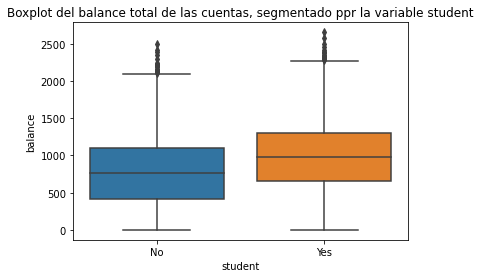

In [2]:
# Utiliza esta celda para realizar el gráfico solicitado

sns.boxplot(x=df["student"], y = df["balance"]);
plt.title("Boxplot del balance total de las cuentas, segmentado ppr la variable student");

**Comentarios**
Se aprecia que que para que para el total de saldo en la cuenta de crédito varia su promedio dependiendo si es o no estudiante.
Por otro se aprecia en el gráfico que existen muchos outliers para los dos grupos.


- Un `boxplot` del ingreso total de cada cliente, segmentado por el status de estudiante.

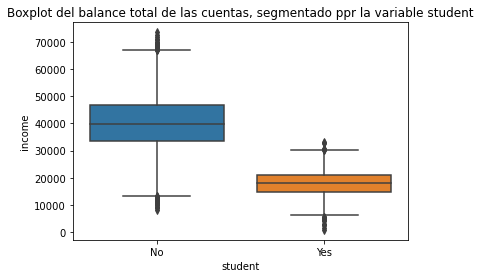

In [3]:
# Utiliza esta celda para realizar el gráfico solicitado

sns.boxplot(x=df["student"], y = df["income"]);
plt.title("Boxplot del balance total de las cuentas, segmentado ppr la variable student");

**Comentarios**
Se aprecia que en promedio el ingreso promedio por cliente es bastante mayor en el caso cuando no es estudiante.
Además se aprecia que dispersión de datos es menor en el grupo que si es estudiante respecto a los ingresos promedios.

- Un `boxplot` del balance total de las cuentas, segmentado por el status de default.

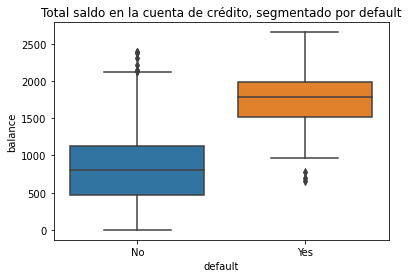

In [4]:
# Utiliza esta celda para realizar el gráfico solicitado

sns.boxplot(x=df["default"], y = df["balance"]);
plt.title("Total saldo en la cuenta de crédito, segmentado por default");

**Comentarios**
Se aprecia en el gráfico que los clientes que entraron en morosidad en promedio tienen un saldo total en la cuenta de crédito mayor a los que no entraron en mora

- Un `boxplot` del ingreso total de cada cliente, segmentado por el status de default.

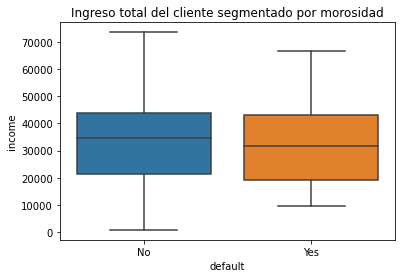

In [5]:
# Utiliza esta celda para realizar el gráfico solicitado

sns.boxplot(x=df["default"], y = df["income"]);
plt.title("Ingreso total del cliente segmentado por morosidad");

**Comentarios**
Se aprecia que el 50% de los datos es mayor en el grupo que no entro en morosidad.

- Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.

Text(0.5, 1.0, 'Diagrama de dispersión entre balance e income segmentado por ')

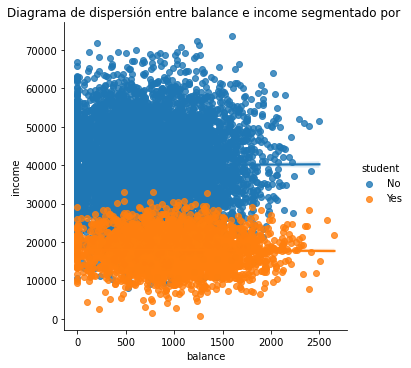

In [6]:
# Utiliza esta celda para realizar el gráfico solicitado

sns.lmplot(x="balance", y="income", data = df, hue="student")
plt.title("Diagrama de dispersión entre balance e income segmentado por ")

**Comentarios**

- Un diagrama de dispersión entre balance e income, segmentado por el status de default.

Text(0.5, 1.0, 'Diagrama de dispersión entre balance e income segmentado por ')

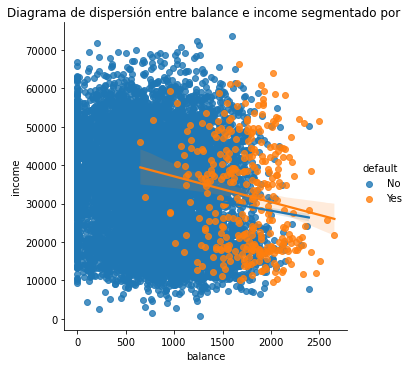

In [7]:
# Utiliza esta celda para realizar el gráfico solicitado

sns.lmplot(x="balance", y="income", data = df, hue="default")
plt.title("Diagrama de dispersión entre balance e income segmentado por ")

**Comentarios**

### Desafío 3: Modelación econométrica
- Recodifique las variables `student` y `default` para que adquieran atributos numéricos.

In [8]:
df["student"].value_counts()


No     7056
Yes    2944
Name: student, dtype: int64

In [9]:
# Utiliza esta celda para realizar las codificaciones solicitadas. Puedes usar LabelEncoder.

df["student"] = np.where(df["student"] == "Yes", 1, 0)

df["student"].value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [10]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [11]:
df["default"] = np.where(df["default"] == "Yes", 1, 0)

df["default"].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [12]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


- Implemente el siguiente modelo econométrico:
$$
\log\left(\frac{p(\text{default}=1)}{1-p(\text{default}=1)}\right)_i = \beta_0 + \beta_{balance} \cdot \text{balance}_i + \beta_{income} \cdot \text{income}_i + \beta_{student} \cdot \text{student}_i
$$

In [13]:
# Utiliza esta celda para entrenar el modelo solicitado

logit_model_default = smf.logit('default ~ student + balance + income', df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [14]:
logit_model_default.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1579.5448  
Date:               2022-08-16 21:09 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
student      -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
==================================================================

"""

In [15]:
coefs = logit_model_default.summary2().tables[1]

coefs

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019


- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [16]:
# Utiliza esta celda para mostrar los coeficientes sifnificativos al 95% de confianza

coefs[coefs["P>|z|"] < 0.05]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191


In [17]:
# Utiliza esta celda para entrenar el modelo depurado

logit_model_default_depurado = smf.logit('default ~ student + balance', df).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [18]:
# Utiliza esta celda para mostrar los coeficientes significativos que influyen positivamente en el modelo depurado

logit_model_default_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1577.6816  
Date:               2022-08-16 21:09 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -10.7495    0.3692  -29.1149  0.0000  -11.4731  -10.0259
student     -0.7149    0.1475   -4.8459  0.0000   -1.0040   -0.4257
balance      0.0057    0.0002   24.7485  0.0000    0.0053    0.0062
==================================================================

"""

**Comentarios**

Al comparar ambos modelos se puede observar que en el modelo depurado es minimamente inferior en el valor de Log-Likelihood,
pero cabe destacar que a pesar de esa diferencia minima cuenta con una variable menos que el modelo saturado o con todas las variables.

### Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo _predictivo_ con las siguientes características:

- Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas

In [19]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [20]:
# Utiliza esta celda para generar los subconjuntos de train y test

from sklearn.model_selection import train_test_split
                                                          #X                          #y
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,"student":"balance"], df["default"], test_size=0.33, random_state=2)


- Estandarice las matrices de atributos de entrenamiento y pruebas usando `StandardScaler()` ajustado solo sobre el conjunto de entrenamiento.

In [21]:
# Utiliza esta celda para estandarizar la matriz de atributos de entrenamiento y aplicar dicha estandarización tanto en train como test

from sklearn.preprocessing import StandardScaler

X_train_std = StandardScaler().fit_transform(X_train)

X_test_std = StandardScaler().fit_transform(X_test)


- Implemente el modelo sin alterar los hiper parámetros.

In [22]:
# Utiliza esta celda para generar el modelo predictivo de LogisticRegression utilizando los datos de entrenamiento

from sklearn.linear_model import LogisticRegression

model_default = LogisticRegression().fit(X_train_std, y_train)

In [23]:
model_default.coef_

array([[-0.363741  ,  2.77361248]])

In [24]:
model_default.intercept_

array([-6.0240722])

- Genere la predicción de las clases y de la probabilidad.

In [31]:
# Utiliza esta celda para generar y almacenar predicciones de clase y de probabilidad

yhat = model_default.predict(X_test_std) 
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
yhat_prob = model_default.predict_proba(X_test_std)[:,1] #Nos indica la probabilidad entre 0 y 1
yhat_prob[:10]

array([1.23166289e-03, 1.42807258e-03, 7.70311268e-04, 2.89756227e-03,
       4.89660738e-01, 1.09303924e-03, 2.27048509e-03, 2.56575056e-05,
       4.62036971e-03, 1.18916058e-03])

In [36]:
#Matriz de confusión permite observar las predicciones predichas

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, yhat))



[[3197   17]
 [  61   25]]


- Reporte las métricas de precisión, recall y f1 para ambas clases.

In [41]:
#con accuracy_score obtendremos la exactitud de obtener casos predichos correctamente

#Hay que tener en consideración que las clases de default esta desbalanceado

from sklearn.metrics import accuracy_score

m1_acc = accuracy_score(y_test, yhat)

m1_acc

0.9763636363636363

In [43]:
from sklearn.metrics import recall_score

recall_model = recall_score(y_test, yhat)

recall_model

0.29069767441860467

In [45]:
from sklearn.metrics import f1_score

f1_spore_model = f1_score(y_test, yhat)

f1_spore_model

0.39062500000000006

In [47]:
# Utiliza esta celda para reportar las métricas solicitadas utilizando classification_report

from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3214
           1       0.60      0.29      0.39        86

    accuracy                           0.98      3300
   macro avg       0.79      0.64      0.69      3300
weighted avg       0.97      0.98      0.97      3300



- Grafique la curva Receiver Operator Characteristic.

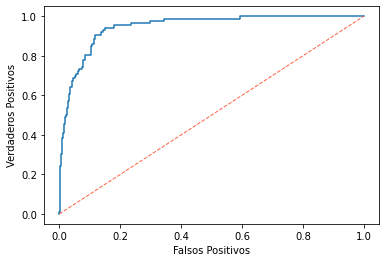

In [59]:
# Utiliza esta celda para graficar la curva ROC

from sklearn.metrics import roc_curve

false_positive, true_positive, threshold = roc_curve(y_test, yhat_prob)

plt.plot(false_positive, true_positive);
plt.plot([0,1], ls="--", lw=1, color="tomato");
plt.ylabel("Verdaderos Positivos");
plt.xlabel("Falsos Positivos");

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, yhat)

0.6427041576822333

- En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.

**Comentarios**

In [ ]:
Para este caso el modelo con los atributos estandarizados, podemos ver que tiene una exactitud promedio de un 0.9763,
ademas al restarle .5 al m1_acc, podemos ver que este miodelo tine un desempeño de un 0.39